<a href="https://colab.research.google.com/github/farhan1503001/Breast-Cancer-Classification-From-Histopathological-Images/blob/master/BreakHTS200_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
import h5py
import numpy as np
import os
import cv2
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [4]:
x_dataset=[]
y_dataset=[]
src=os.listdir('/content/drive/My Drive/200/benign/')
i=0
for filename in src:
    full_file_name='/content/drive/My Drive/200/benign/'+filename
    x=cv2.imread(full_file_name)
    x=np.array(x,dtype='float32')
    y=0
    y=np.array(y,dtype='float32')
    x=x/255.0
    x=cv2.resize(x,(224,224))
    x_dataset.append(x)
    y_dataset.append(y)
    i=i+1
    if i%100==0:
      print(i)
    else:
      pass

100
200
300
400
500
600


In [5]:
src=os.listdir('/content/drive/My Drive/200/malignant/')
i=0
for filename in src:
    full_file_name='/content/drive/My Drive/200/malignant/'+filename
    x=cv2.imread(full_file_name)
    x=np.array(x,dtype='float32')
    y=1
    y=np.array(y,dtype='float32')
    x=x/255.0
    x=cv2.resize(x,(224,224))
    x_dataset.append(x)
    y_dataset.append(y)
    
    i=i+1
    if i%100==0:
      print(i)
    else:
      pass

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300


In [6]:
X_dataset=np.array(x_dataset)
Y_dataset=np.array(y_dataset)
Y_dataset=Y_dataset.reshape((2013,1))

In [7]:
from sklearn.utils import shuffle
X_dataset,Y_dataset = shuffle(X_dataset,Y_dataset, random_state=0)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_dataset,Y_dataset,test_size=0.20)

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
folds=list(StratifiedShuffleSplit(n_splits=5,random_state=1).split(x_train,y_train))

In [10]:
Inception=tf.keras.applications.Xception(include_top=False,input_shape=(224,224,3))
input_image=tf.keras.layers.Input((224,224,3))
x=Inception (input_image)
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(1)(x)
out=tf.keras.layers.Activation(activation='sigmoid')(x)

model=tf.keras.Model(inputs=input_image,outputs=out)

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])


83689472/83683744 [==============================] - 1s 0us/step


In [11]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc,roc_curve
from matplotlib import pyplot as plt

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(  rotation_range=7,
                                     width_shift_range=0.05,
                                     height_shift_range=0.05,
                                     shear_range=0.2,
                                     zoom_range=0.45,
                                     horizontal_flip=True)
val_datagen = ImageDataGenerator(zoom_range=0.45)

Fold 1
Epoch 1/50
46/46 [==============================] - 109s 1s/step - loss: 0.5549 - accuracy: 0.7032 - val_loss: 1.2564 - val_accuracy: 0.7019
Epoch 2/50
46/46 [==============================] - 64s 1s/step - loss: 0.2122 - accuracy: 0.9226 - val_loss: 1.4292 - val_accuracy: 0.7081
Epoch 3/50
46/46 [==============================] - 64s 1s/step - loss: 0.1682 - accuracy: 0.9341 - val_loss: 0.8549 - val_accuracy: 0.7702
Epoch 4/50
46/46 [==============================] - 64s 1s/step - loss: 0.0984 - accuracy: 0.9606 - val_loss: 0.7697 - val_accuracy: 0.8199
Epoch 5/50
46/46 [==============================] - 64s 1s/step - loss: 0.1059 - accuracy: 0.9636 - val_loss: 0.7716 - val_accuracy: 0.8323
Epoch 6/50
46/46 [==============================] - 64s 1s/step - loss: 0.0605 - accuracy: 0.9801 - val_loss: 0.6150 - val_accuracy: 0.9006
Epoch 7/50
46/46 [==============================] - 64s 1s/step - loss: 0.0369 - accuracy: 0.9834 - val_loss: 0.7754 - val_accuracy: 0.8634
Epoch 8/50
4

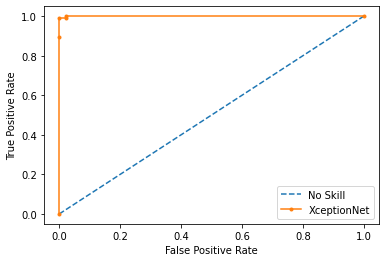

Fold 2
Epoch 1/50
46/46 [==============================] - 65s 1s/step - loss: 0.0143 - accuracy: 0.9959 - val_loss: 3.3261e-04 - val_accuracy: 1.0000
Epoch 2/50
46/46 [==============================] - 64s 1s/step - loss: 0.0112 - accuracy: 0.9986 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 3/50
46/46 [==============================] - 65s 1s/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0103 - val_accuracy: 0.9938
Epoch 4/50
46/46 [==============================] - 65s 1s/step - loss: 0.0191 - accuracy: 0.9965 - val_loss: 0.0257 - val_accuracy: 0.9938
Epoch 5/50
46/46 [==============================] - 65s 1s/step - loss: 0.0158 - accuracy: 0.9945 - val_loss: 0.0178 - val_accuracy: 0.9938
Epoch 6/50
46/46 [==============================] - 64s 1s/step - loss: 0.0078 - accuracy: 0.9979 - val_loss: 3.4257e-06 - val_accuracy: 1.0000
Epoch 7/50
46/46 [==============================] - 64s 1s/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 5.6363e-04 - val_accuracy: 1.0000
E

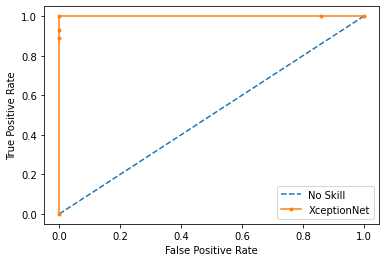

Fold 3
Epoch 1/50
46/46 [==============================] - 64s 1s/step - loss: 4.0726e-04 - accuracy: 1.0000 - val_loss: 2.4476e-10 - val_accuracy: 1.0000
Epoch 2/50
46/46 [==============================] - 64s 1s/step - loss: 0.0018 - accuracy: 0.9986 - val_loss: 2.1370e-10 - val_accuracy: 1.0000
Epoch 3/50
46/46 [==============================] - 64s 1s/step - loss: 0.0069 - accuracy: 0.9986 - val_loss: 6.3007e-08 - val_accuracy: 1.0000
Epoch 4/50
46/46 [==============================] - 64s 1s/step - loss: 0.0017 - accuracy: 0.9993 - val_loss: 4.1247e-11 - val_accuracy: 1.0000
Epoch 5/50
46/46 [==============================] - 64s 1s/step - loss: 0.0071 - accuracy: 0.9972 - val_loss: 1.1856e-09 - val_accuracy: 1.0000
Epoch 6/50
46/46 [==============================] - 64s 1s/step - loss: 0.0077 - accuracy: 0.9979 - val_loss: 1.7235e-10 - val_accuracy: 1.0000
Epoch 7/50
46/46 [==============================] - 64s 1s/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 7.3974e-10 - va

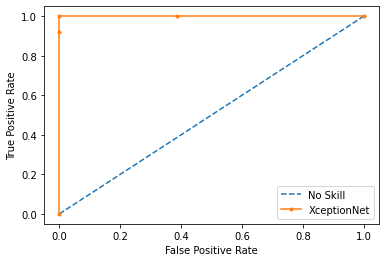

Fold 4
Epoch 1/50
46/46 [==============================] - 65s 1s/step - loss: 0.0026 - accuracy: 0.9986 - val_loss: 1.2540e-05 - val_accuracy: 1.0000
Epoch 2/50
46/46 [==============================] - 64s 1s/step - loss: 5.5909e-04 - accuracy: 1.0000 - val_loss: 4.0426e-05 - val_accuracy: 1.0000
Epoch 3/50
46/46 [==============================] - 64s 1s/step - loss: 0.0126 - accuracy: 0.9972 - val_loss: 0.0468 - val_accuracy: 0.9876
Epoch 4/50
46/46 [==============================] - 64s 1s/step - loss: 0.0015 - accuracy: 0.9993 - val_loss: 2.3781e-06 - val_accuracy: 1.0000
Epoch 5/50
46/46 [==============================] - 64s 1s/step - loss: 1.8467e-04 - accuracy: 1.0000 - val_loss: 3.3209e-07 - val_accuracy: 1.0000
Epoch 6/50
46/46 [==============================] - 64s 1s/step - loss: 0.0060 - accuracy: 0.9986 - val_loss: 7.9923e-06 - val_accuracy: 1.0000
Epoch 7/50
46/46 [==============================] - 64s 1s/step - loss: 0.0063 - accuracy: 0.9979 - val_loss: 1.4590e-05 - va

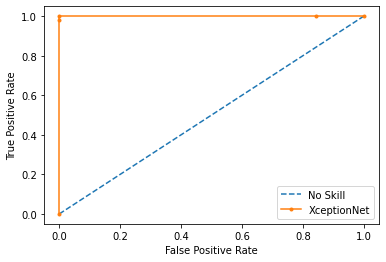

Fold 5
Epoch 1/50
46/46 [==============================] - 64s 1s/step - loss: 0.0062 - accuracy: 0.9986 - val_loss: 3.2817e-04 - val_accuracy: 1.0000
Epoch 2/50
46/46 [==============================] - 64s 1s/step - loss: 1.0790e-04 - accuracy: 1.0000 - val_loss: 3.7832e-04 - val_accuracy: 1.0000
Epoch 3/50
46/46 [==============================] - 65s 1s/step - loss: 0.0371 - accuracy: 0.9993 - val_loss: 1.9103e-07 - val_accuracy: 1.0000
Epoch 4/50
46/46 [==============================] - 64s 1s/step - loss: 3.4045e-04 - accuracy: 1.0000 - val_loss: 1.3897e-08 - val_accuracy: 1.0000
Epoch 5/50
46/46 [==============================] - 64s 1s/step - loss: 9.3452e-05 - accuracy: 1.0000 - val_loss: 1.8209e-08 - val_accuracy: 1.0000
Epoch 6/50
46/46 [==============================] - 64s 1s/step - loss: 3.2845e-06 - accuracy: 1.0000 - val_loss: 1.7898e-10 - val_accuracy: 1.0000
Epoch 7/50
46/46 [==============================] - 64s 1s/step - loss: 0.0090 - accuracy: 0.9986 - val_loss: 5.2

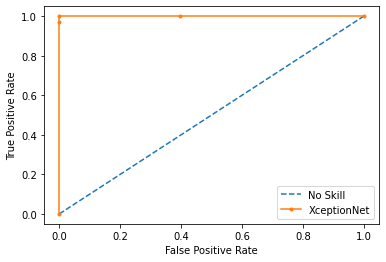

In [13]:
History=[]
Prescore=[]
Recall=[]
F1=[]
Sensspeci=[]
Roc_auc=[]
for j,(train_idx,val_idx) in enumerate(folds):
    print("Fold "+str(j+1))
    
    x_train=X_dataset[train_idx]
    y_train=Y_dataset[train_idx]
    x_val=X_dataset[val_idx]
    y_val=Y_dataset[val_idx]
    history=model.fit(train_datagen.flow(x_train,y_train),batch_size=32,epochs=50,validation_data=(x_val,y_val))
    y_predict=model.predict(x_val)
    Y_predict=np.float32(y_predict>0.50)
    l=len(y_val)
    Y_predict=np.reshape(Y_predict,(l,1))
    prescore=precision_score(y_val,Y_predict,average='binary')
    recaller=recall_score(y_val,Y_predict,average='binary')
    score=f1_score(y_val,Y_predict,average='binary')
    sensitivity=sensitivity_specificity_support(y_val,Y_predict,average='binary')
    print("Precision: ",prescore)
    print("Recall: ",recaller)
    print("F1-score ",score)
    print("Sensitivity ",sensitivity)
    History.append(history)
    Prescore.append(prescore)
    F1.append(score)
    Recall.append(recaller)
    Sensspeci.append(sensitivity)
    fpr, tpr, thresholds = roc_curve(y_val,y_predict)
    auc = roc_auc_score(y_val, y_predict)
    print("Precision: ",prescore)
    print("Recall: ",recaller)
    print("F1-score ",score)
    print("Sensitivity ",sensitivity)
    print("AUC: ",auc)
    plt.plot([0,1],[0,1], linestyle='--', label='No Skill')
    plt.plot(fpr,tpr, marker='.', label='XceptionNet')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()


In [14]:
val_acc=History[0].history['val_accuracy']
val_acc1=History[1].history['val_accuracy']
val_acc2=History[2].history['val_accuracy']
val_acc3=History[3].history['val_accuracy']
val_acc4=History[4].history['val_accuracy']
Accuracvalid1=val_acc[49]
Accuracyvalid2=val_acc1[49]
Accuracyvalid3=val_acc2[49]
Accuracyvalid4=val_acc3[49]
Accuracyvalid5=val_acc4[49]
Mean_valid_Accuracy=(Accuracvalid1+Accuracyvalid2+Accuracyvalid3+Accuracyvalid4+Accuracyvalid5)/5.00
print("validation Accuracy for Fold-1 ",Accuracvalid1)
print("validation Accuracy for Fold-2",Accuracyvalid2)
print("Validation Accuracy for Fold-3 ",Accuracyvalid3)
print("Validation Accuracy for Fold-4  ",Accuracyvalid4)
print("Validation Accuracy for Fold-5  ",Accuracyvalid5)
print("Mean Validation Accuracy ",Mean_valid_Accuracy)

validation Accuracy for Fold-1  0.9937888383865356
validation Accuracy for Fold-2 1.0
Validation Accuracy for Fold-3  1.0
Validation Accuracy for Fold-4   1.0
Validation Accuracy for Fold-5   1.0
Mean Validation Accuracy  0.9987577676773072


In [15]:
print("Printing the precision scores and average of them")
avg=0.0
for i in range(5):
  print("Precision of Fold -",i+1,Prescore[i])
  avg=avg+Prescore[i]

print("Average precision-score ",avg/5.00)

Printing the precision scores and average of them
Precision of Fold - 1 0.9911504424778761
Precision of Fold - 2 1.0
Precision of Fold - 3 1.0
Precision of Fold - 4 1.0
Precision of Fold - 5 1.0
Average precision-score  0.9982300884955752


In [16]:
print("Printing the recall scores and average of them")
avgr=0.0
for i in range(5):
  print("Precision of Fold -",i+1,Recall[i])
  avgr=avgr+Recall[i]

print("Average precision-score ",avgr/5.00)

Printing the recall scores and average of them
Precision of Fold - 1 1.0
Precision of Fold - 2 1.0
Precision of Fold - 3 1.0
Precision of Fold - 4 1.0
Precision of Fold - 5 1.0
Average precision-score  1.0


In [17]:
print("Printing the F-1 scores and average of them")
avgf=0.0
for i in range(5):
  print("Precision of Fold -",i+1,F1[i])
  avgf=avgf+F1[i]

print("Average f1-score ",avgf/5.00)

Printing the F-1 scores and average of them
Precision of Fold - 1 0.9955555555555555
Precision of Fold - 2 1.0
Precision of Fold - 3 1.0
Precision of Fold - 4 1.0
Precision of Fold - 5 1.0
Average f1-score  0.9991111111111112


In [18]:
print("Printing the sensitivity scores and average of them")
avgsen=0.0
for i in range(5):
  print("Precision of Fold -",i+1,Sensspeci[i][0])
  avgsen=avgsen+Sensspeci[i][0]

print("Average sensitivity-score ",avgsen/5.00)

Printing the sensitivity scores and average of them
Precision of Fold - 1 1.0
Precision of Fold - 2 1.0
Precision of Fold - 3 1.0
Precision of Fold - 4 1.0
Precision of Fold - 5 1.0
Average sensitivity-score  1.0


In [19]:
print("Printing the specificity scores and average of them")
avgsp=0.0
for i in range(5):
  print("Precision of Fold -",i+1,Sensspeci[i][1])
  avgsp=avgsp+Sensspeci[i][1]

print("Average specificity-score ",avgsp/5.00)

Printing the specificity scores and average of them
Precision of Fold - 1 0.9795918367346939
Precision of Fold - 2 1.0
Precision of Fold - 3 1.0
Precision of Fold - 4 1.0
Precision of Fold - 5 1.0
Average specificity-score  0.9959183673469388


In [20]:
y_predict=model.predict(x_test)
predict=np.float32(y_predict>0.50)
predict=np.reshape(predict,(403,1))
print(Y_predict)

[[1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
metrics=confusion_matrix(y_test,predict)
print(metrics)

[[117   0]
 [  0 286]]


In [38]:
precision= precision_score(y_test,predict)
print(precision)

1.0


In [40]:
recall= recall_score(y_test,predict)
print(recall)

1.0


In [41]:
from sklearn.metrics import auc,roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_predict)
auc = roc_auc_score(y_test, y_predict)

In [42]:
print(auc)

1.0


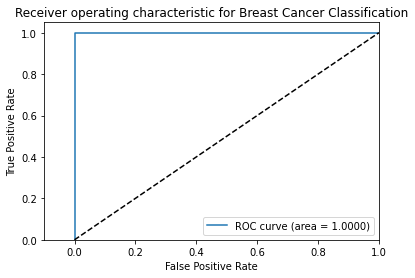

In [44]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr,label='ROC curve (area = %0.4f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Breast Cancer Classification')
plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

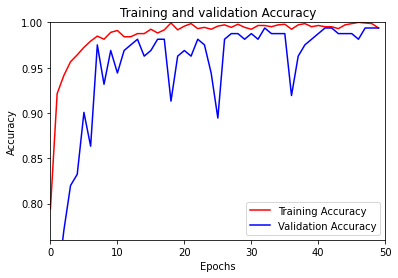

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
acc=History[0].history['accuracy']
val_acc=History[0].history['val_accuracy']
loss=History[0].history['loss']
val_loss=History[0].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.760,1.00))
plt.xlim([0,50])
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

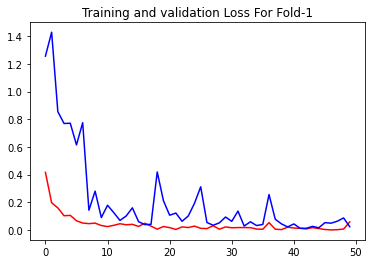

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation Loss For Fold-1")
plt.figure()

<Figure size 432x288 with 0 Axes>

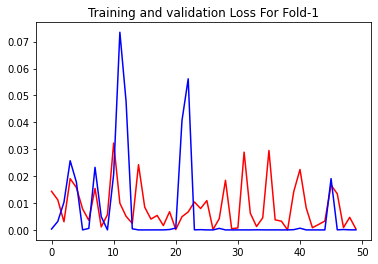

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation Loss For Fold-1")
plt.figure()

<Figure size 432x288 with 0 Axes>

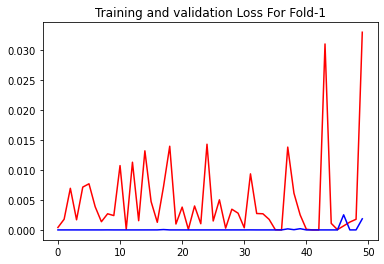

<Figure size 432x288 with 0 Axes>

In [28]:
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation Loss For Fold-1")
plt.figure()

<Figure size 432x288 with 0 Axes>

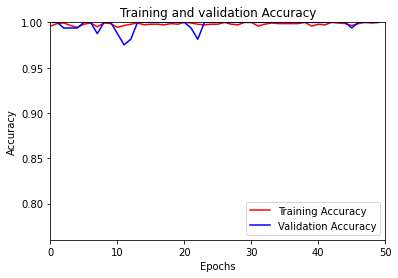

<Figure size 432x288 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
acc=History[1].history['accuracy']
val_acc=History[1].history['val_accuracy']
loss=History[1].history['loss']
val_loss=History[1].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.760,1.00))
plt.xlim([0,50])
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

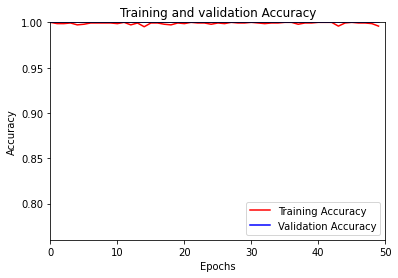

<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
acc=History[2].history['accuracy']
val_acc=History[2].history['val_accuracy']
loss=History[2].history['loss']
val_loss=History[2].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.760,1.00))
plt.xlim([0,50])
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

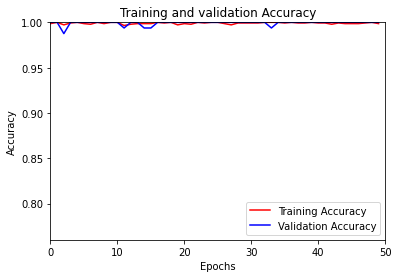

<Figure size 432x288 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt
acc=History[3].history['accuracy']
val_acc=History[3].history['val_accuracy']
loss=History[3].history['loss']
val_loss=History[3].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.760,1.00))
plt.xlim([0,50])
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

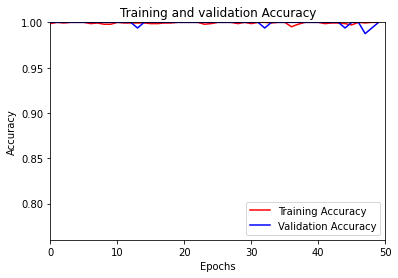

<Figure size 432x288 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt
acc=History[4].history['accuracy']
val_acc=History[4].history['val_accuracy']
loss=History[4].history['loss']
val_loss=History[4].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.760,1.00))
plt.xlim([0,50])
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

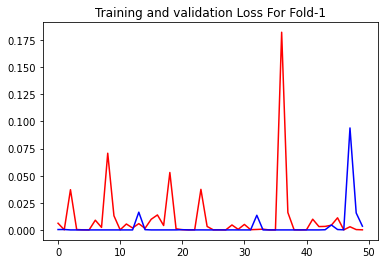

<Figure size 432x288 with 0 Axes>

In [36]:
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation Loss For Fold-1")
plt.figure()

<Figure size 432x288 with 0 Axes>

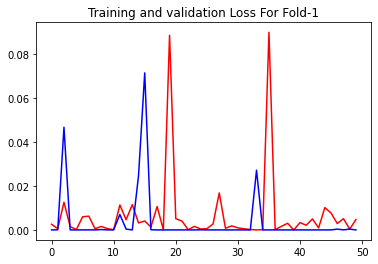

<Figure size 432x288 with 0 Axes>

In [32]:
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation Loss For Fold-1")
plt.figure()